# HR Analystics: Job Change of data scientists

__by Dauren Tursynbek__

### Context and Content

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

__Features__

* enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

Source: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

### Exploratory Data Analysis 

In [46]:
#import necessary libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#read csv file flom local storage
df = pd.read_csv(r"C:\Users\Asus\Desktop\aug.csv")
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [48]:
#get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [49]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [50]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [51]:
#df['relevent_experience'].replace(to_replace=['No relevent experience','Has relevent experience'], value=[0,1],inplace=True)
#df.head()

In [52]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

### Data Visualization

<AxesSubplot:title={'center':'Target count for gender'}, xlabel='Gender', ylabel='Target count'>

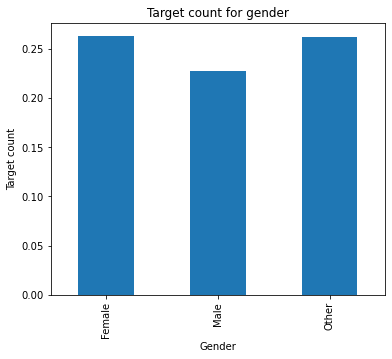

In [53]:
df.groupby(df['gender'])['target'].mean().plot(kind='bar', title='Target count for gender', ylabel='Target count',
         xlabel='Gender', figsize=(6, 5))

<AxesSubplot:title={'center':'Target count for relevant eperience'}, xlabel='Relevant experience', ylabel='Target count'>

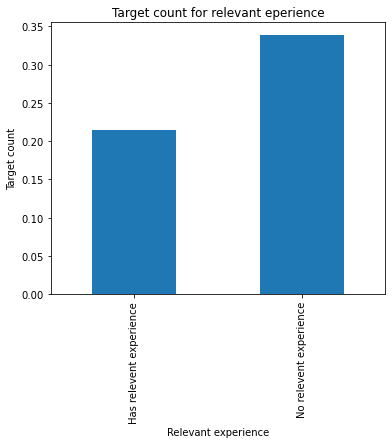

In [54]:
df.groupby(df['relevent_experience'])['target'].mean().plot(kind='bar', title='Target count for relevant eperience', ylabel='Target count',
         xlabel='Relevant experience', figsize=(6, 5))

<AxesSubplot:title={'center':'Target count for company size'}, xlabel='Company size', ylabel='Target count'>

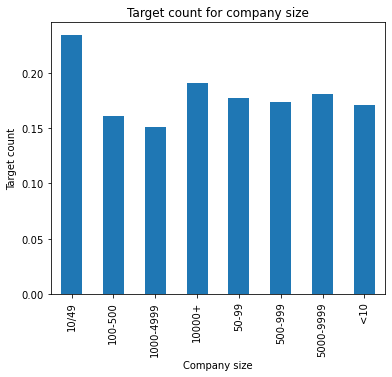

In [55]:
df.groupby(df['company_size'])['target'].mean().plot(kind='bar', title='Target count for company size', ylabel='Target count',
         xlabel='Company size', figsize=(6, 5))

<AxesSubplot:title={'center':'Target count for major discpline'}, xlabel='Major discipline', ylabel='Target count'>

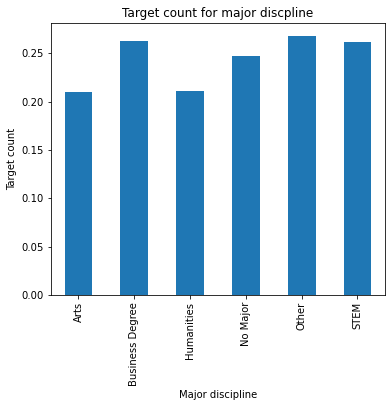

In [56]:
df.groupby(df['major_discipline'])['target'].mean().plot(kind='bar', title='Target count for major discpline', ylabel='Target count',
         xlabel='Major discipline', figsize=(6, 5))

<AxesSubplot:title={'center':'Target count for enrolled university'}, xlabel='Enrolled university', ylabel='Target count'>

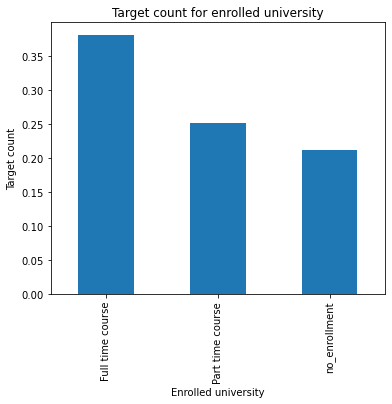

In [57]:
df.groupby(df['enrolled_university'])['target'].mean().plot(kind='bar', title='Target count for enrolled university', ylabel='Target count',
         xlabel='Enrolled university', figsize=(6, 5))

The graph shows that the more workers study aside from their job the more they are likely to quit it.

<AxesSubplot:title={'center':'Target count for education level'}, xlabel='Education level', ylabel='Target count'>

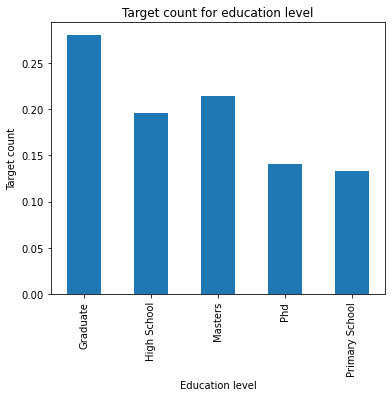

In [58]:
df.groupby(df['education_level'])['target'].mean().plot(kind='bar', title='Target count for education level', ylabel='Target count',
         xlabel='Education level', figsize=(6, 5))

The graph shows that the higher the education level of a worker the less is the probability of him quitting the job.

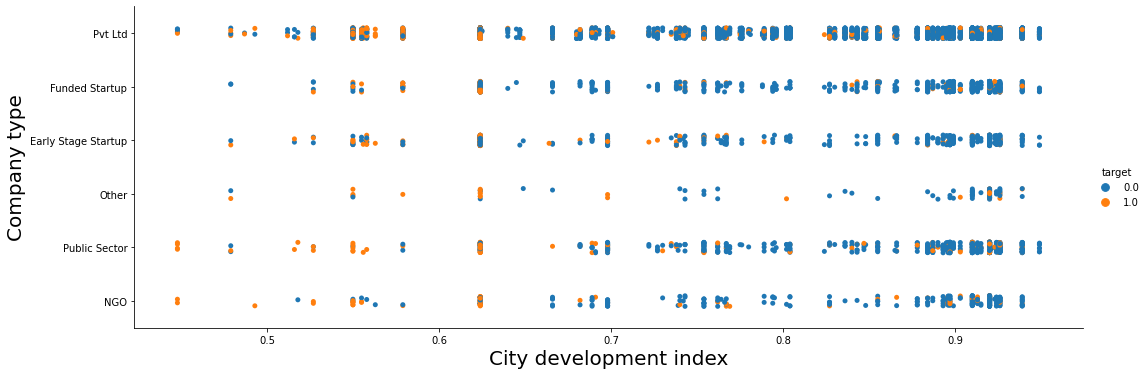

In [59]:
sns.catplot(y="company_type", x="city_development_index", hue="target", data=df, aspect = 3)
plt.xlabel("City development index",fontsize=20)
plt.ylabel("Company type",fontsize=20)
plt.show()

The graph shows that data scientists working in __public sector__ and __NGO__ in cities with lower development index are most likelyto quit the job.

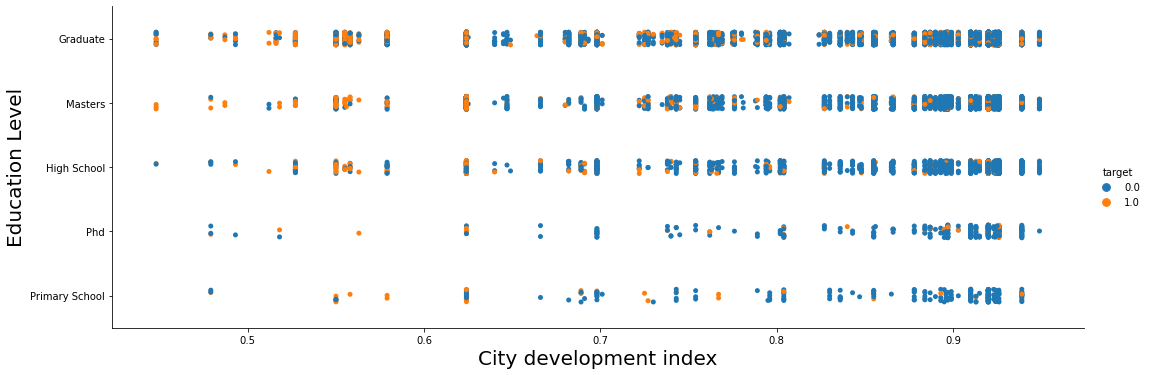

In [60]:
sns.catplot(y="education_level", x="city_development_index", hue="target", data=df, aspect = 3)
plt.xlabel("City development index",fontsize=20)
plt.ylabel("Education Level",fontsize=20)
plt.show() 

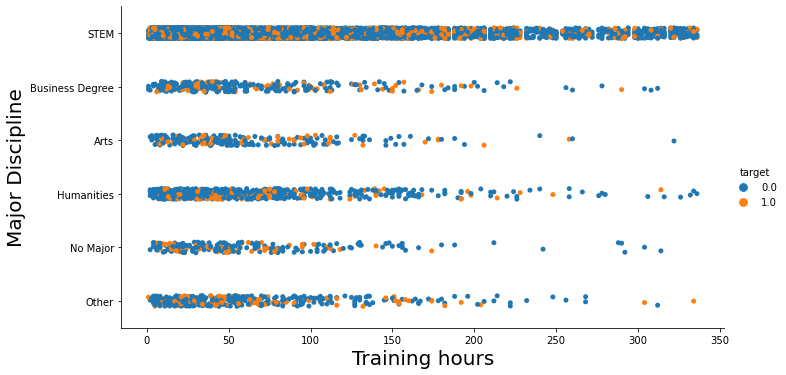

In [61]:
sns.catplot(y="major_discipline", x="training_hours", hue="target", data=df, aspect = 2)
plt.xlabel("Training hours",fontsize=20)
plt.ylabel("Major Discipline",fontsize=20)
plt.show() 

## Machine Learning Prediction

First of all, we implement One-Hot-Encoding because almost all variables are categorical. After that, we implement standardization to equalize scales of all variables. 

In [62]:
data = df.loc[:, df.columns != 'target']
data = pd.get_dummies(df.loc[:, df.columns != 'enrollee_id'])
data.head(10)

,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.776,47,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.624,83,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.789,52,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.767,8,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0.764,24,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0.920,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0.762,18,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0.920,46,1.0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
9,0.920,123,0.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [63]:
transform = preprocessing.StandardScaler()
transform.fit(data)
data = transform.transform(data)
data

array([[ 0.73891926, -0.4889846 ,  1.73506969, ..., -0.23824334,
        -0.4553411 , -0.38311045],
       [-0.42840976, -0.30582494, -0.57634573, ..., -0.23824334,
         2.1961558 , -0.38311045],
       [-1.66059039,  0.29360665, -0.57634573, ..., -0.23824334,
        -0.4553411 ,  2.61021334],
       ...,
       [ 0.73891926, -0.35577758, -0.57634573, ...,  4.19738916,
        -0.4553411 , -0.38311045],
       [-0.21764202,  0.52671894, -0.57634573, ..., -0.23824334,
        -0.4553411 , -0.38311045],
       [ 0.21199991,  1.02624527, -0.57634573, ..., -0.23824334,
        -0.4553411 , -0.38311045]])

__Train/test split__

In [64]:
X = data
Y = df['target'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

__Confusion Matrix Function__

In [65]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1])

__Logistic Regression__

In [66]:
lr=LogisticRegression()
logreg_cv = lr.fit(X_train, Y_train)

Calculate the accuracy on the test data using the method score:

In [68]:
logreg_cv.score(X_test,Y_test)

1.0

The confusion matrix:

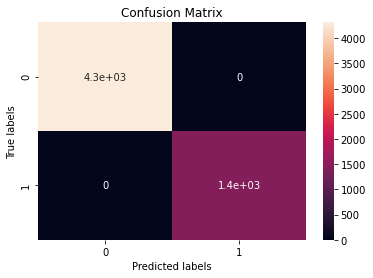

In [69]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

__Support Vector Machine__

In [70]:
svm = SVC()
svm_cv = svm.fit(X_train, Y_train)

Calculate the accuracy on the test data using the method score:

In [72]:
svm_cv.score(X_test,Y_test)

0.9813848295059151

The confusion matrix:

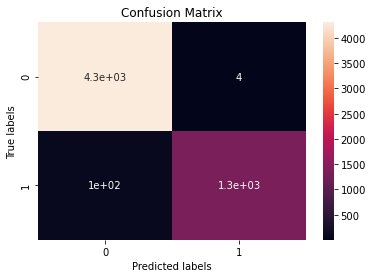

In [74]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

__Decision Tree Classifier__

In [75]:
tree = DecisionTreeClassifier()
tree_cv = tree.fit(X_train, Y_train)

Calculate the accuracy on the test data using the method score:

In [76]:
tree_cv.score(X_test,Y_test)

1.0

The confusion matrix:

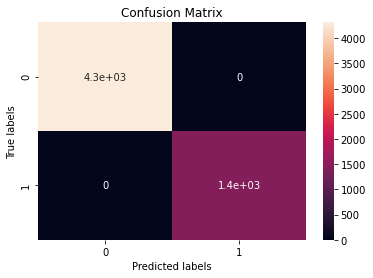

In [77]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

__K-Nearest-Neighbor Classifier__

In [79]:
KNN = KNeighborsClassifier()
knn_cv = KNN.fit(X_train, Y_train)

Calculate the accuracy of tree_cv on the test data using the method score:

In [80]:
knn_cv.score(X_test,Y_test)

0.8475991649269311

The confusion matrix:

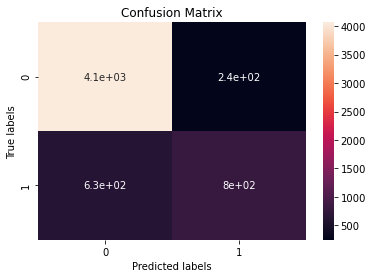

In [81]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The accuracy scores show that Logistic Regression and Decision Tree Classifier perform the best at predicting the target value.